In [ ]:
Analyse des données du grand débat

Analyse du grand débat

In [ ]:
import pandas as pd
import plotly
import plotly.plotly as py
#import  plotly.offline  as py
import plotly.graph_objs as go
import os
import textwrap
%matplotlib inline
import matplotlib.pyplot as plt
from pywaffle import Waffle
from collections import OrderedDict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words
#py.offline.init_notebook_mode(connected=True)
plotly.tools.set_credentials_file(username=os.environ['PLOTLY_USERNAME'], api_key=os.environ['PLOTLY_API_KEY'])

In [439]:
df = pd.read_csv('granddebat.csv')
print(len(df))
df = df[df['enabled'] == True]
print(len(df))
print(df.columns)
df['themes'] = df['themes'].astype(list)
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['startAt'] = pd.to_datetime(df['startAt'])
df['endAt'] = pd.to_datetime(df['endAt'])

print(df['themes'][0])
df.head()

2091
2091
Index(['id', 'fullAddress', 'address ', 'body', 'participantsCount', 'zipCode',
       'city', 'lat', 'lng', 'title', 'startAt', 'endAt', 'createdAt',
       'commentsCount', 'enabled', 'url', 'themes', 'authorId',
       'authorUsername', 'authorDisplayName', 'authorTotalEventsCount',
       'authorVIP', 'authorOpinionsCount', 'authorProjectsCount',
       'authorArgumentsCount', 'authorProposalsCount', 'authorTypeId',
       'authorTypeName', 'authorTotalVotes'],
      dtype='object')
[{'id': 'c71b870a-128b-11e9-89cc-0242ac110004', 'url': 'https://granddebat.fr/themes/la-democratie-et-la-citoyennete', 'title': 'La démocratie et la citoyenneté'}]


,id,fullAddress,address,body,participantsCount,zipCode,city,lat,lng,title,...,authorDisplayName,authorTotalEventsCount,authorVIP,authorOpinionsCount,authorProjectsCount,authorArgumentsCount,authorProposalsCount,authorTypeId,authorTypeName,authorTotalVotes
0,RXZlbnQ6MDBiN2U4YTUtMWE4NC0xMWU5LTk0ZDItZmExNj...,"Maison de sports,salon Ollier, place des Bughe...","Maison de sports,salon Ollier, place des Bughes",<p><em>L’exactitude des informations ci-dessou...,0,63000.0,Clermont-Ferrand,45.785997,3.085917,"Le Handicap, une politique transversale et un ...",...,raynal,1,False,0,0,0,0,3.0,Organisation à but non lucratif,0
1,RXZlbnQ6MDE3NTFhZjYtMTljMy0xMWU5LTk0ZDItZmExNj...,"Mairie (salle Iris) - 20 rue de Rennes, 35520 ...",Mairie (salle Iris) - 20 rue de Rennes,<p><em>L’exactitude des informations ci-dessou...,0,35520.0,MELESSE,48.216201,-1.697474,RÉUNION CITOYENNE,...,NaN,4,False,0,0,0,0,1.0,Citoyen,0
2,RXZlbnQ6MDFmNzk2MzktMWFhYi0xMWU5LTk0ZDItZmExNj...,"Mairie, Place Pierre Mendes France, 27180 SAIN...","Mairie, Place Pierre Mendes France",<p><em>L’exactitude des informations ci-dessou...,0,27180.0,SAINT SEBASTIEN DE MORSENT,49.007760,1.087950,Le grand débat à SAINT SEBASTIEN DE MORSENT,...,NaN,2,False,0,0,0,0,4.0,Elu et Institution,0
3,RXZlbnQ6MDI5ZjM3MDgtMWI0NS0xMWU5LTk0ZDItZmExNj...,"Salle Jean GOURGUET, Place du village, 21390 A...","Salle Jean GOURGUET, Place du village",<p><em>L’exactitude des informations ci-dessou...,0,21390.0,AISY SOUS THIL,47.394157,4.287655,Grand Débat National - Réunion 1- Démocratie e...,...,ILLIG,4,False,0,0,0,0,4.0,Elu et Institution,0
4,RXZlbnQ6MDJiMTMzYzItMWE3MS0xMWU5LTk0ZDItZmExNj...,"SAFRA, Villa Roger Bodoira, 26 avenue Albipôle...","SAFRA, Villa Roger Bodoira, 26 avenue Albipôle",<p><em>L’exactitude des informations ci-dessou...,0,81000.0,Albi,43.918433,2.091542,Grand débat - SAFRA organise une réunion publi...,...,SAFRA,1,False,0,0,0,0,2.0,Organisation à but lucratif,0


In [440]:
print(df['themes'][0])
df['themes'] = df['themes'].astype(list)
print(df['themes'][0])

[{'id': 'c71b870a-128b-11e9-89cc-0242ac110004', 'url': 'https://granddebat.fr/themes/la-democratie-et-la-citoyennete', 'title': 'La démocratie et la citoyenneté'}]
[{'id': 'c71b870a-128b-11e9-89cc-0242ac110004', 'url': 'https://granddebat.fr/themes/la-democratie-et-la-citoyennete', 'title': 'La démocratie et la citoyenneté'}]


In [441]:
df.describe()

,participantsCount,zipCode,lat,lng,commentsCount,authorTotalEventsCount,authorOpinionsCount,authorProjectsCount,authorArgumentsCount,authorProposalsCount,authorTypeId,authorTotalVotes
count,2091.000000,1890.000000,2065.000000,2065.000000,2091.0,2091.000000,2091.0,2091.0,2091.0,2091.000000,2048.000000,2091.0
mean,0.332377,52763.662434,46.709183,2.390701,0.0,2.716404,0.0,0.0,0.0,0.049737,3.097168,0.0
std,5.620877,27095.121912,3.816011,12.265337,0.0,2.778491,0.0,0.0,0.0,0.366561,1.272701,0.0
min,0.000000,1000.000000,-17.720467,-149.304113,0.0,1.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
25%,0.000000,32027.500000,45.068496,0.638353,0.0,1.000000,0.0,0.0,0.0,0.000000,1.750000,0.0
50%,0.000000,57330.000000,47.445784,2.364030,0.0,2.000000,0.0,0.0,0.0,0.000000,4.000000,0.0
75%,0.000000,75269.000000,48.835204,4.769735,0.0,4.000000,0.0,0.0,0.0,0.000000,4.000000,0.0
max,181.000000,97423.000000,59.859056,139.739776,0.0,23.000000,0.0,0.0,0.0,6.000000,4.000000,0.0


In [465]:
creators_types = df.groupby('authorTypeId')['authorTypeId'].count()
print(creators_types)
creators_names = ['Citoyen', 'Organisation à but lucratif', 'Organisation à but non lucratif', 'Elu et Institution']
creators = dict(zip(creators_names, creators_types))
creators = OrderedDict(sorted(creators.items(), key=lambda x: x[1], reverse=True))
for ix, total in enumerate(creators_types):
    print('Ratio for {user} is {ratio}%'.format(user=creators_names[ix], ratio=(total / len(df)) * 100))
creators

authorTypeId
1.0     512
2.0      32
3.0     249
4.0    1255
Name: authorTypeId, dtype: int64
Ratio for Citoyen is 24.48589191774271%
Ratio for Organisation à but lucratif is 1.5303682448589193%
Ratio for Organisation à but non lucratif is 11.908177905308465%
Ratio for Elu et Institution is 60.01912960306074%


OrderedDict([('Elu et Institution', 1255),
             ('Citoyen', 512),
             ('Organisation à but non lucratif', 249),
             ('Organisation à but lucratif', 32)])

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1743: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



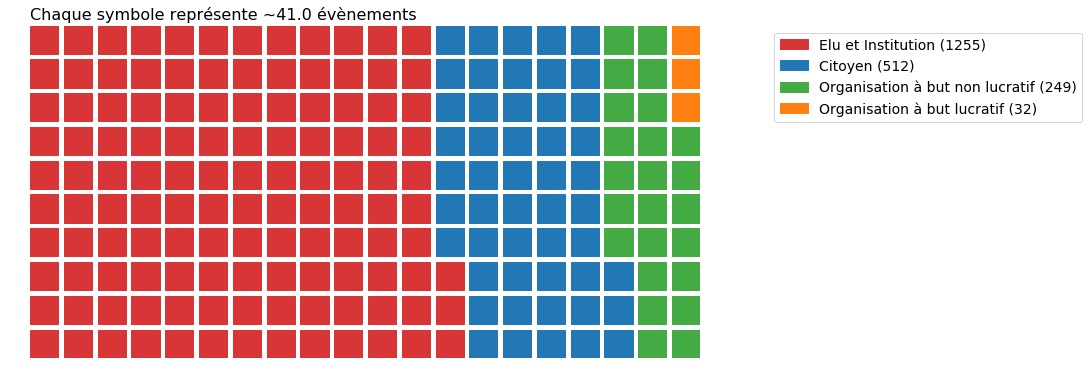

In [468]:
ordered_names = creators.keys()
ordered_values = list(creators.values())
by_symbol = (df['authorTypeId'].count() / 100 * 2)
fig = plt.figure(
    FigureClass=Waffle,
    title={'label': "Chaque symbole représente ~{nb} évènements".format(nb=round(by_symbol)), 'loc': 'left', 'fontsize': 16},
    rows=10, 
    columns=20, 
    values=creators,
    figsize=(10, 7),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'fontsize': 14},
    colors=['#d83636', '#2178b4', '#44aa44', '#ff8011'],
    labels=["{0} ({1})".format(k, v) for k, v in creators.items()],
    #icons=['university', 'child', 'hands-helping', 'building'],
    icon_size=18,
    #interval_ratio_x= 0.0,
    #interval_ratio_y=0.0,
)
plt.savefig('proportion.png')
plt.show()

In [449]:
#print(df[df['authorTypeId'] == 1]['createdAt'].dt.day)
date_df = df.set_index('createdAt')
date_df.groupby(date_df.index.date)['id'].count()
date_df = date_df[date_df.index < '2019-01-28']

In [470]:
x = df['createdAt']
data = []
annotations = []
for ix, user in enumerate(creators_names):
    clean_user = '<br>'.join(textwrap.wrap(user, 20))
    tmp_df = date_df[date_df['authorTypeId'] == ix + 1]
    x = tmp_df.groupby(tmp_df.index.date)['id'].count().index
    y = tmp_df.groupby(tmp_df.index.date)['id'].count().values
    trace = go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        name=user,
        hoverinfo='y',
    )
    annotations.append(dict(xref='paper', x=0.05, y=y[0],
                                  xanchor='right', yanchor='middle',
                                  text='{}'.format(clean_user),
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))

    data.append(trace)
annotations.append(dict(
            x="2019-01-18",
            y=180,
            xref='x',
            yref='y',
            text='Macron avec les\nmaires en Occitanie',
            showarrow=True,
            arrowhead=2,
            font=dict(family='Arial', size=16),
            ax=0,
            ay=-40
        )
)
annotations.append(dict(
            x="2019-01-24",
            y=180,
            xref='x',
            yref='y',
            text='Macron au\ndébat en Drôme',
            showarrow=True,
            font=dict(family='Arial', size=16),
            arrowhead=2,
            ax=0,
            ay=40
        )
)
layout = dict(
    showlegend=False,
    xaxis=dict(
        showline=True,
        showgrid=False
    ),
    margin=dict(l=100),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=False,
        showticklabels=True,
        side='right',
    ),
)
layout['annotations'] = annotations
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='test')

/usr/local/lib/python3.5/dist-packages/plotly/tools.py:1457: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [446]:
#print(df['themes'].unique())
themes = ['La démocratie et la citoyenneté', 'La transition écologique', 'La fiscalité et les dépenses publiques', "L'organisation de l'État et des services publics"]
df_by_themes = {}
for ix, theme in enumerate(themes):
    df['theme_{nb}'.format(nb=ix)] = df['themes'].apply(lambda x: theme in x)
print(df['theme_3'][2])
print(df['themes'][2])

True
[{'id': '4160bb34-129d-11e9-89cc-0242ac110004', 'url': 'https://granddebat.fr/themes/la-transition-ecologique', 'title': 'La transition écologique'}, {'id': 'b7c5399b-128b-11e9-89cc-0242ac110004', 'url': 'https://granddebat.fr/themes/la-fiscalite-et-les-depenses-publiques', 'title': 'La fiscalité et les dépenses publiques'}, {'id': 'c71b870a-128b-11e9-89cc-0242ac110004', 'url': 'https://granddebat.fr/themes/la-democratie-et-la-citoyennete', 'title': 'La démocratie et la citoyenneté'}, {'id': 'd4777a85-128b-11e9-89cc-0242ac110004', 'url': 'https://granddebat.fr/themes/lorganisation-de-letat-et-des-services-publics', 'title': "L'organisation de l'État et des services publics"}]


In [518]:
themes_authors = {}
print(len(df))
df['nb_themes'] = df['themes'].apply(lambda x: x.count('}'))
not_all_df = df[df['nb_themes'] < 4]
print(len(not_all_df))
for ix, theme in enumerate(themes):
    part_df = not_all_df[not_all_df['theme_{nb}'.format(nb=ix)]].groupby('authorTypeId')['authorTypeId'].count()
    by_symbol = (part_df.sum() / 100 * 2)
    themes_authors[theme] = dict(zip(creators_names, part_df))
    themes_authors[theme] = OrderedDict(sorted(themes_authors[theme].items(), key=lambda x: x[1], reverse=True))
    '''fig = plt.figure(
        FigureClass=Waffle,
        title={'label': """"{theme_}".\nChaque symbole représente {nb} personnes ou entités""".format(nb=round(by_symbol), theme_=theme), 'loc': 'left', 'fontsize': 16},
        rows=10, 
        columns=20, 
        values=themes_authors[theme],
        figsize=(10, 7),
        legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'fontsize': 14},
        colors=['#d83636', '#2178b4', '#44aa44', '#ff8011'],
        labels=["{0} ({1})".format(k, v) for k, v in themes_authors[theme].items()],
        #icons=['child', 'child', 'child', 'child'], icon_size=12, 
    )'''

#plt.show()

#.groupby('authorTypeId')['authorTypeId'].count()


2091
995


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1743: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



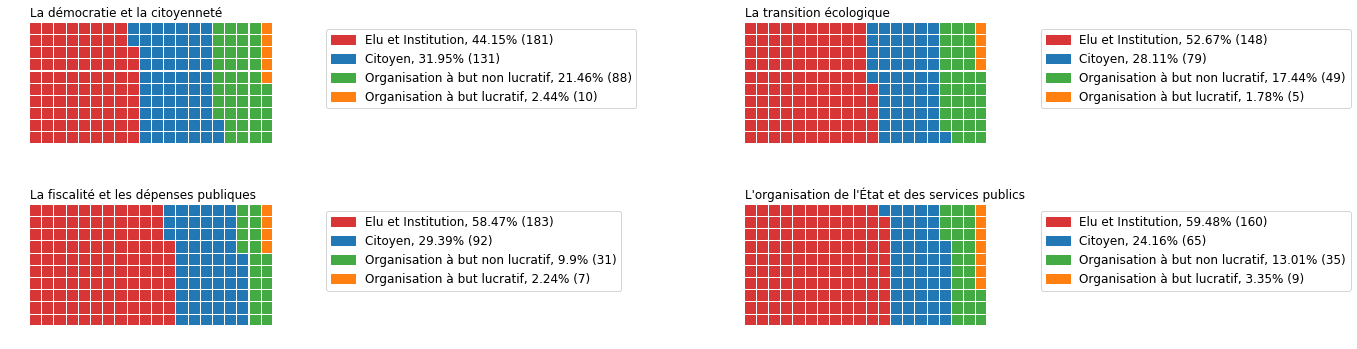

In [519]:
plots = {}
for ix, pos in enumerate(['411', '422', '423', '424']):
    all_total = sum(map(lambda x: themes_authors[themes[ix]][x], themes_authors[themes[ix]]))
    plots[pos] = {
            'values': themes_authors[themes[ix]],
            'labels': ["{name}, {ratio}% ({total})".format(name=name, total=total, ratio=round((total/all_total) * 100, 2)) for name, total in themes_authors[themes[ix]].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 12},
            'title': {'label': themes[ix], 'loc': 'left'},
            'colors':['#d83636', '#2178b4', '#44aa44', '#ff8011'],
        }
fig = plt.figure(
    FigureClass=Waffle,
    #x y
    plots=plots,
    #legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'fontsize': 14},
    rows=10,
    columns=20,
    #colors=("#2196f3", "#ff5252", "#999999"),  # Default argument values for subplots
    figsize=(20, 10)  # figsize is a parameter of plt.figure
)
plt.savefig('test.png')

In [571]:
for i in range(2, 5):
    tmp_df = df[df['authorTypeId'] == i].sort_values('authorTotalEventsCount', ascending=False)
    tmp_df = tmp_df.groupby('authorId')
    print(creators_names[i - 1])
    result_df = tmp_df[['authorDisplayName', 'authorTotalEventsCount', 'url']].first()
    values = result_df.sort_values('authorTotalEventsCount', ascending=False).head()[['authorDisplayName', 'authorTotalEventsCount', 'url']].values
    print(values)

    #print(tmp_df[['authorDisplayName', 'authorUsername', 'authorTotalEventsCount']].head())

Organisation à but lucratif
[['AUD' 5
  'https://granddebat.fr/events/grand-debat-national-ateliers-en-pays-de-saint-omer-febvin-palfart']
 ['Yves QUEMENEUR' 5
  'https://granddebat.fr/events/comment-mieux-organiser-la-democratie-au-plus-pres-des-citoyens']
 ['Olivier Raoul-Duval' 2
  'https://granddebat.fr/events/dejeuner-debat-organisation-de-letat-et-des-services-publics']
 ['Henri deschaux beaume' 2
  'https://granddebat.fr/events/grand-debat-national-81']
 ['STH' 2 'https://granddebat.fr/events/reunion-publique-a-marcy-letoile']]
Organisation à but non lucratif
[['U2P - Union des Entreprises de Proximité' 23
  'https://granddebat.fr/events/grand-debat-des-entreprises-de-proximite-nord-villeneuve-dascq']
 ['Vittorio' 5
  'https://granddebat.fr/events/grand-debat-national-au-patronage-laique-jules-valles']
 ['DKOENIG' 5
  'https://granddebat.fr/events/le-grand-debat-ballan-mire-5-tous-sujets']
 ['Joa4763' 4
  'https://granddebat.fr/events/le-grand-gaspillage-comment-reduire-les-depe

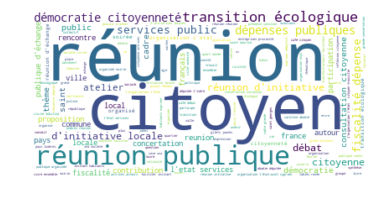

In [603]:
#' '.join(df['title'].values)
text = ' '.join(df['title'].values)
text = text.lower()

text = text.split(' ')
text = list(filter(('grand').__ne__, text))
text = list(filter(('débat').__ne__, text))
text = list(filter(('debat').__ne__, text))
text = list(filter(('national').__ne__, text))

wordcloud = WordCloud(background_color="white", max_words=2000, stopwords=get_stop_words('french')).generate(' '.join(text))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('cloud.png')
plt.show()
